A demonstration of using eScriptorium to look at the distribution of interlinear glosses across a manuscript.

The example data below comes from [Cambridge, Corpus Christi College MS 178](https://parker.stanford.edu/parker/catalog/pm669yz1553), segmented using [eScriptorium](https://escriptorium.readthedocs.io/en/latest/FAQ/#how-can-i-have-an-escriptorium-account) with the [interlinear_BL](https://github.com/malamatenia/Eutyches/tree/main/kraken-YALTAi/models) model developed by Malamatenia Vlachou that was trained to detect **only** interlinear glosses in Carolingian manuscripts. For this reason, the number of lines in each ALTO file gives a good estimate of the number of interlinear glosses on that page.

This exercise assumes that you have already generated the ALTO and METS files and exported them to your system, presumably using eScriptorium although any other method would also work.

The code here can also be applied on any other manuscript, assuming the images are available, but it is strongly recommended to first check the results of the model to get an idea of its accuracy for your document.

Peter A. Stokes, EPHE-PSL, May 2025.

In [1]:
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt


You should already have an eScriptorium (or equivalent) export downloaded and stored locally, which should contain one ALTO file per page, plus a METS file for the document. The path to that folder (relative to this notebook) should be stored in `path` here.

In [2]:
path="export_doc5445_cccc_178_alto_202505131407"

Now we create two helper functions, one to load in an ALTO file and count the number of TextLine elements (as an estimate of the number of interlinear glosses), and one to load in a METS file and get the list of ALTO files in order as they appear in the document.

In [3]:
# Count the number of TextLine elements in a given ALTO XML file. 
# We can then use this as an estimate of the number of interlinear glosses on the page
def count_textline_elements(alto_xml_path) -> int:
    # Parse the XML file
    tree = ET.parse(alto_xml_path)
    root = tree.getroot()
    
    # Define the namespace
    namespace = {'alto': 'http://www.loc.gov/standards/alto/ns-v4#'}
    
    # Find all TextLine elements
    textline_elements = root.findall('.//alto:TextLine', namespace)
    
    # Return the count of TextLine elements
    return len(textline_elements)

In [4]:
# Get a list of ALTO XML files from the METS XML file. Note that we can't just read the contents of the directory,
# because then the order of the files would be undefined, whereas the METS file will give the order of the document.
def get_files_from_mets(mets_xml_path) -> list:
    tree = ET.parse(mets_xml_path)
    root = tree.getroot()

    # Define the namespace
    ns_mets = {'mets': 'http://www.loc.gov/METS/'}

    # Find all FLocat elements
    flocat_elements = root.findall('.//mets:FLocat', ns_mets)
    
    # Iterate over FLocat elements and collect their attributes
    # Could be much more pythony!
    href_list = []

    for flocat in flocat_elements:
        href_list.append(flocat.get('{http://www.w3.org/1999/xlink}href'))

    return href_list

Now let's use these functions on our ALTO export and look at the results, first as a simple list of values, then with some graphical displays.

In [12]:
# Create a list of the counts of TextLine elements in each ALTO XML file
countlist = []
filelist = get_files_from_mets(os.path.join(path, "METS.xml"))
for f in filelist:
    countlist.append(count_textline_elements(os.path.join(path, f)))

In [ ]:
# Let's look at the result as a simple list
print(countlist)

[5, 7, 11, 8, 3, 3, 6, 5, 3, 11, 6, 6, 7, 12, 11, 7, 15, 5, 5, 3, 20, 6, 11, 17, 14, 13, 8, 7, 16, 7, 7, 10, 14, 12, 24, 7, 10, 8, 13, 11, 10, 14, 5, 9, 1, 7, 6, 5, 9, 10, 4, 5, 10, 8, 6, 7, 13, 7, 5, 11, 12, 11, 8, 14, 13, 10, 16, 20, 18, 10, 4, 10, 9, 4, 12, 7, 12, 15, 20, 22, 20, 4, 13, 10, 7, 17, 26, 16, 16, 17, 25, 17, 11, 12, 17, 13, 14, 11, 14, 8, 17, 11, 7, 9, 6, 18, 13, 17, 19, 17, 15, 15, 20, 15, 17, 13, 15, 15, 19, 20, 20, 14, 11, 13, 18, 14, 12, 10, 15, 8, 26, 14, 29, 12, 16, 11, 20, 12, 16, 14, 6, 18, 17, 18, 18, 13, 10, 14, 17, 15, 19, 14, 12, 11, 17, 19, 17, 12, 16, 14, 7, 12, 9, 27, 21, 15, 17, 9, 12, 10, 13, 17, 13, 21, 17, 14, 18, 4, 20, 12, 21, 20, 25, 31, 19, 14, 20, 21, 15, 12, 11, 12, 9, 11, 7, 6, 15, 4, 7, 7, 20, 13, 13, 7, 13, 10, 14, 11, 25, 19, 20, 15, 14, 15, 17, 16, 19, 7, 13, 12, 7, 15, 18, 16, 19, 16, 11, 4, 7, 4, 8, 2, 7, 10, 5, 12, 6, 7, 10, 8, 3, 9, 6, 14, 2, 9, 6, 5, 6, 8, 3, 6, 8, 15, 10, 14, 8, 14, 11, 9, 2, 3, 6, 10, 8, 6, 3, 4, 0, 2, 0, 1, 5, 45, 7

In [ ]:
# List the files with the most and least glosses detected
max_index = countlist.index(max(countlist))
min_index = countlist.index(min(countlist))
print(f"File with most interlinear glosses detected: {filelist[max_index]} ({countlist[max_index]} glosses)")
print(f"File with least interlinear glosses detected: {filelist[min_index]} ({countlist[min_index]} glosses)")


File with most interlinear glosses detected: 304_ead30_default.xml (63 glosses)
File with least interlinear glosses detected: 280_33165_default.xml (0 glosses)


Now let's display the counts as a histogram to get an idea of how many glosses are on each page on average.

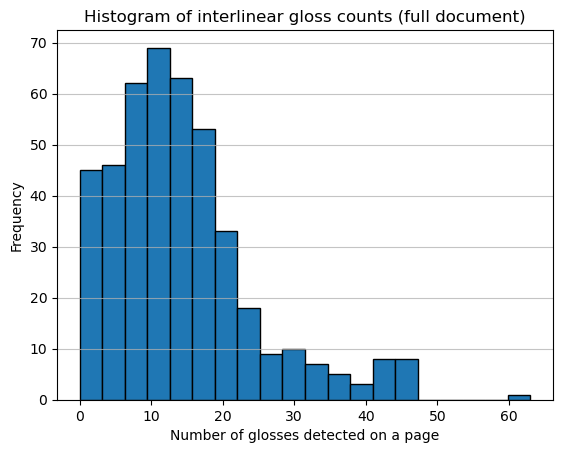

In [39]:
# Display the counts in a histogram
# Include an optional subtitle so we can understand what we're looking at
def plot_histogram(data, bins=20, subtitle='') -> None:
    plt.hist(data, bins=bins, edgecolor='black')
    plt.xlabel('Number of glosses detected on a page')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of interlinear gloss counts {f"({subtitle})" if subtitle else ""}')
    plt.grid(axis='y', alpha=0.75)
    plt.show()

plot_histogram(countlist, subtitle='full document')

Now let's generate a scatter plot, with the vertical axis the number of glosses and the horizontal axis the position (page number) in the book. Look for any sudden changes in the distribution: can you match this to any codicological or textual feature?

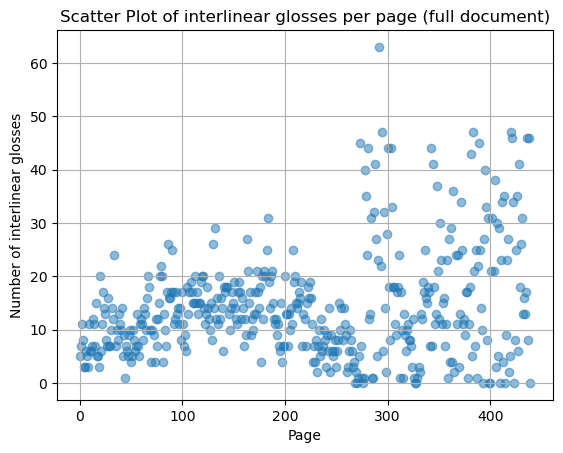

In [35]:
# Create a scatter plot of the data
def plot_scatter(data, subtitle='') -> None:
    plt.scatter(range(len(data)), data, alpha=0.5)
    plt.xlabel('Page')
    plt.ylabel('Number of interlinear glosses')
    plt.title(f'Scatter Plot of interlinear glosses per page {f"({subtitle})" if subtitle else ""}')
    plt.grid()
    plt.show()

plot_scatter(countlist, subtitle='full document')


Clearly something happened around page 270. In fact, if you look at [the description of the manuscript](https://parker.stanford.edu/parker/catalog/pm669yz1553), you'll see that it comprises two different volumes bound together, with the change precisely around this area. Let's redo the histograms, one for the first part and one for the second, to see the difference.

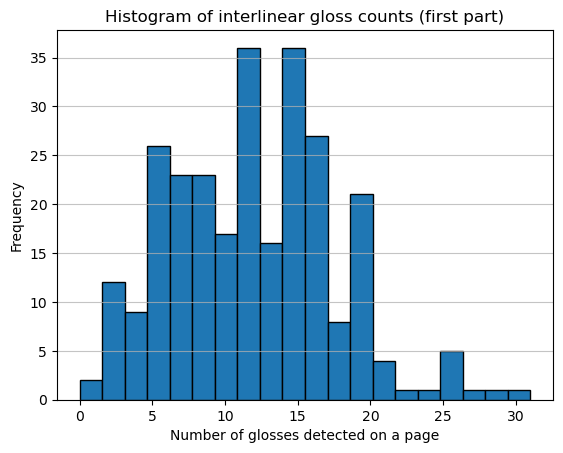

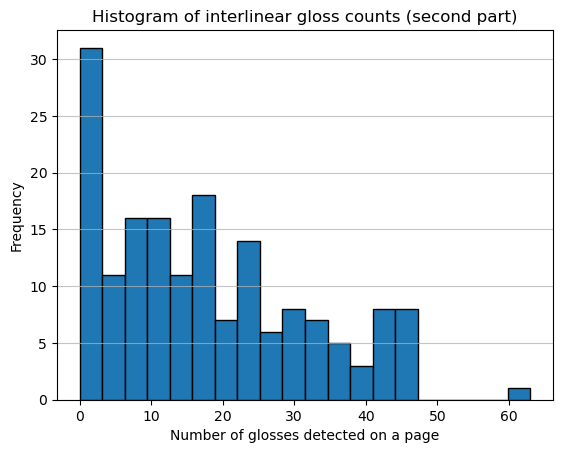

In [36]:
# Plot histogram of first and second parts of the list
plot_histogram(countlist[:270], subtitle='first part')
plot_histogram(countlist[270:], subtitle='second part')


And now we can look at the scatter plot for each part.

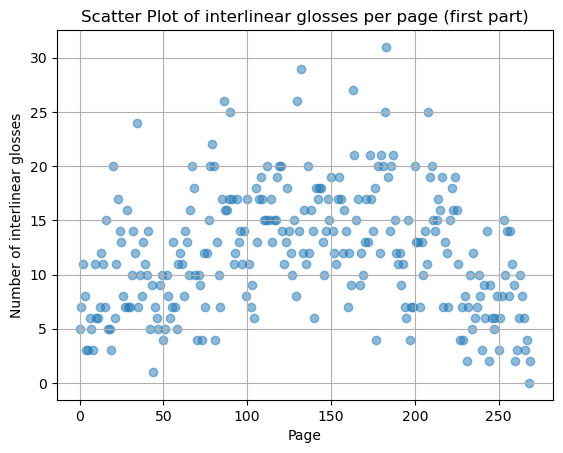

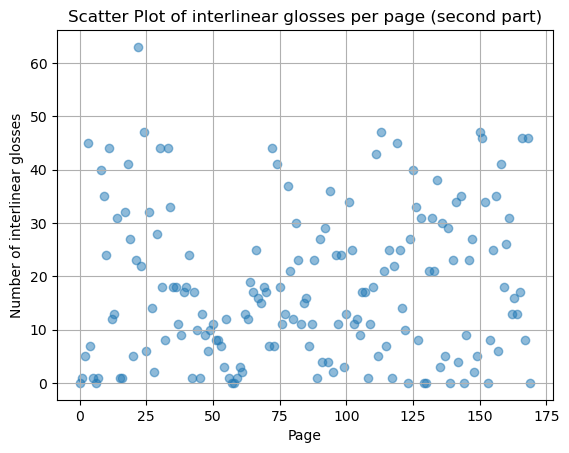

In [38]:
plot_scatter(countlist[:270], subtitle='first part')
plot_scatter(countlist[270:], subtitle='second part')